In [1]:
"""Data inspection."""

'Data inspection.'

In [131]:
import importlib
import matplotlib
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

import analyze
importlib.reload(analyze)
import datasets
importlib.reload(datasets)
import toylosses
importlib.reload(toylosses)
import vis
importlib.reload(vis)

CRYO_DIR = '/cryo/'

TRAIN_VAL_DIR = os.path.join(CRYO_DIR, 'train_val_datasets')

OUTPUT_SIM = '/scratch/users/nmiolane/output_cryo_sim'
OUTPUT_EXP = '/scratch/users/nmiolane/output_cryo_exp'
OUTPUT_EXP_3D = '/scratch/users/nmiolane/output_cryo_exp_3d'

VAL_DATASET_PATH_SIM = os.path.join(TRAIN_VAL_DIR, 'cryo_sim_128x128.npy')  # total dataset
VAL_DATASET_PATH_EXP = os.path.join(TRAIN_VAL_DIR, 'cryo_exp_128x128.npy')  # total dataset
VAL_DATASET_PATH_EXP_3D = os.path.join(TRAIN_VAL_DIR, 'val_cryo_exp_3d_90x90.npy')

CMAP = 'gray'
DEVICE = 'cuda'

# Number of data in each dataset

In [138]:
cryo_exp_3d_total = np.load(os.path.join(TRAIN_VAL_DIR, 'cryo_exp_3d_90x90.npy'))
print(cryo_exp_3d_total.shape)

(285299, 1, 90, 90)


# Figures showing datasets

Loading /cryo/train_val_datasets/cryo_sim_128x128.npy
Dataset shape: (2544, 1, 128, 128)
Loading /cryo/train_val_datasets/cryo_exp_128x128.npy
Dataset shape: (8278, 1, 128, 128)
Loading /cryo/train_val_datasets/val_cryo_exp_3d_90x90.npy
Dataset shape: (14265, 1, 90, 90)


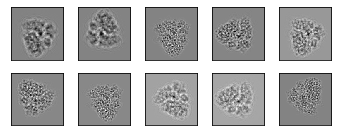

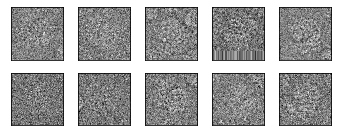

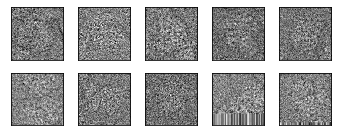

In [65]:
vis.show_data(VAL_DATASET_PATH_SIM, nrows=2, ncols=5, figsize=(4.8, 2))
#plt.title('Simulated Dataset', loc='left', fontsize=20)
vis.show_data(VAL_DATASET_PATH_EXP, nrows=2, ncols=5, figsize=(4.8, 2))
#plt.title('Simulated Dataset')
vis.show_data(VAL_DATASET_PATH_EXP_3D, nrows=2, ncols=5, figsize=(4.8, 2))
#plt.title('Simulated Dataset')

# Figures showing training

In [139]:
def old_load_losses(output_dir, epoch_id):

    loss_types = [
        'total',
        'discriminator', 'generator',
        'reconstruction', 'regularization']
    train_losses = {loss_type: [] for loss_type in loss_types}
    val_losses = {loss_type: [] for loss_type in loss_types}

    for i in range(epoch_id+1):
        losses_filename = os.path.join(
            output_dir, 'training/losses/epoch_%d.pkl' % i)
        train_val = pickle.load(open(losses_filename, 'rb'))
        train = train_val['train']
        val = train_val['val']

        for loss_type in loss_types:
            loss = train[loss_type]
            train_losses[loss_type].append(loss)

            loss = val[loss_type]
            val_losses[loss_type].append(loss)
    return train_losses, val_losses

def old_plot_criterion(ax, output, algo_name='vae', crit_name='neg_elbo',
                   mode='train', start_epoch_id=0, epoch_id=None,
                   color='blue', dashes=False):

    train_losses_total, val_losses_total = old_load_losses(
        output_dir=output, epoch_id=epoch_id)
    if mode == 'train':
        losses_total = train_losses_total
    elif mode == 'val':
        losses_total = val_losses_total
    
    losses_total = losses_total[crit_name]

    n_epochs = len(losses_total)
    epochs = range(n_epochs)
    if epoch_id is not None:
        epoch_id = min(epoch_id, n_epochs)

    label = '%s Loss' % (
        #vis.ALGO_STRINGS[algo_name],
        vis.TRAIN_VAL_STRINGS[mode])
        #vis.CRIT_STRINGS[crit_name])

    if not dashes:
        ax.plot(
            epochs[start_epoch_id:epoch_id],
            losses_total[start_epoch_id:epoch_id],
            label=label, color=color, linewidth=3)
    else:
        ax.plot(
            epochs[start_epoch_id:epoch_id],
            losses_total[start_epoch_id:epoch_id],
            label=label, color=color, dashes=[2, 2, 2, 2], linewidth=3)
    ax.set_xlabel('epochs')
    ax.legend()
    return ax

def old_plot_convergence(ax, output, algo_name, crit_name,
                     start_epoch_id=0, epoch_id=None):
    ax = old_plot_criterion(
        ax, output, algo_name=algo_name, crit_name=crit_name, mode='train',
        start_epoch_id=start_epoch_id, epoch_id=epoch_id,
        color=vis.COLOR_DICT[crit_name])
    ax = old_plot_criterion(
        ax, output, algo_name=algo_name, crit_name=crit_name, mode='val',
        start_epoch_id=start_epoch_id, epoch_id=epoch_id,
        color=vis.COLOR_DICT[crit_name], dashes=True)
    ax.set_title('Convergence of %s.' % vis.ALGO_STRINGS[algo_name])
    return ax

Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp/train_vae/epoch_55_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp/train_vae/epoch_55_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_55_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_55_checkpoint.pth.


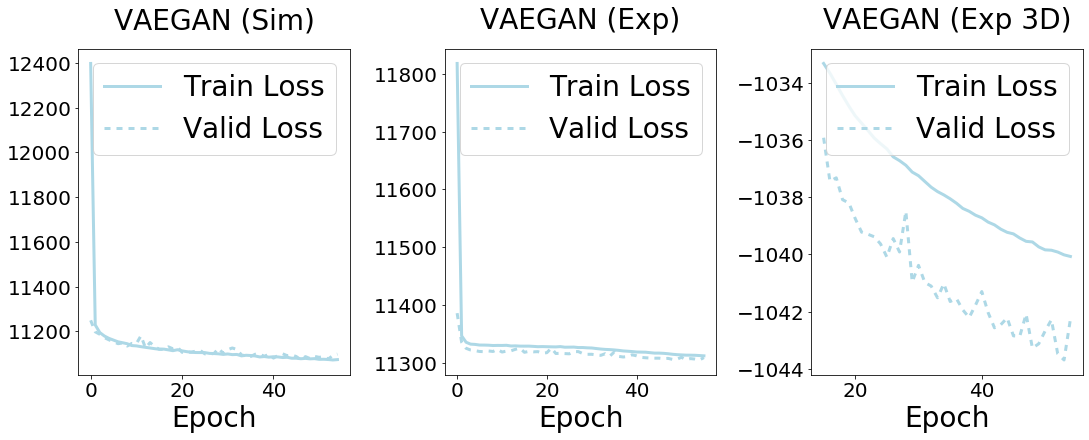

In [150]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

ax = axes[0]
ax = old_plot_convergence(
    ax, OUTPUT_SIM, algo_name='vae', crit_name='total', start_epoch_id=0, epoch_id=55)
ax.legend(fontsize=28)
ax.set_title('VAEGAN (Sim)', fontsize=28, pad=20)
ax.set_xlabel('Epoch', fontsize=28)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax = axes[1]
ax = vis.plot_convergence(
    ax, OUTPUT_EXP, algo_name='vae', crit_name='total', start_epoch_id=0)#,  epoch_id=55)
ax.legend(fontsize=28)
ax.set_title('VAEGAN (Exp)', fontsize=28, pad=20)
ax.set_xlabel('Epoch', fontsize=28)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)


ax = axes[2]
ax = vis.plot_convergence(
    ax, OUTPUT_EXP_3D, algo_name='vae', crit_name='total', start_epoch_id=15, epoch_id=55)#, epoch_id=epoch_id)
ax.legend(fontsize=28)
ax.set_title('VAEGAN (Exp 3D)', fontsize=28, pad=20)
ax.set_xlabel('Epoch', fontsize=28)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.subplots_adjust(hspace=0.35, wspace=0.35)

# Figures showing reconstructions across epochs